# 05839 Final Project - Part 1 EDA
## Zhaoyi Ma, Ed Tsoi, Jiawei Ni, Yuzong Gao (Group 18)

### Median rental price data across different states in the United States from 2014-2019


### Goals of our work:
- 2020-2021 is certainly a crazy year to be in. With the COVID-19 pandemic still ongoing, numerous lives have been lost and the world's economy has been hit extremely hard. To help people determine how the world's changing condition would affect the median rental price in the city that they want to live in, we have examined both the Federal Reserve's interest rate data and the zillow house price data (which includes median rental prices for different apartments). Through our work, we hope to:
1. Help our audience visualize whether there is a correlation between federal reserve's interest rate and the median rental price.
2. Help our audience determine what factors (e.g. state, metro, region, #of bedrooms) will affect rental price the most.
3. Help our audience predict future median rental price in their city, using our pre-trained machine learning model.

### Approach:
1. We hope to use the story-telling techniques learned in class, and combine the two datasets below to draw compelling graphs that will help our audience understand the relationship between federal reserve interest rate and the median rental price.

2. We used statistical analysis (feature selection) technique to help our audience understand how these external factors impact median rental price.

3. We will use a pre-trained, machine learning model that will predict rental price based on information such as # of bedrooms, city, county, state, regionName etc.

### Source - datasets used:
1. Zillow house price data (https://www.kaggle.com/paultimothymooney/zillow-house-price-data)
2. Federal Reserve Interest rates, 1954-Present (https://www.kaggle.com/federalreserve/interest-rates)

### Issues Summary:
1. After carefully inspect the dataset, we found that column A contains 0-index of the entries(rows). However, this is not useful for our analysis so we decided to drop it.
2. We also found that there are a lot of NaN values in our datasets. 
3. Based on the result from the univariate analysis below, among the top 15 states, states such as CA, FL and TX have more entries than others, which could lead to skewness on interpretation of the data

In [292]:
import numpy as np
import pandas as pd
import plotly.express as px
import chart_studio
import datetime
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

plt.style.use('fivethirtyeight')
sns.set_style('white')

# Login to chart_studio
user_name, api_key = "edtsoi430", "9AJEw9U4i66g6Ut85M3U"
chart_studio.tools.set_credentials_file(username=user_name, api_key=api_key)

import chart_studio.plotly as py
import chart_studio.tools as tls

In [293]:
# Colors for plotting:
colors1 = ['#e6ccb2','#b08968','#7f5539'] 
colors2 = ['#ede0d4','#e6ccb2','#ddb892','#b08968','#7f5539','#9c6644','#dda15e']

In [294]:
# Loading data and converting column name to visualize data type easily.
one_bed = pd.read_csv('dataset/City_MedianRentalPrice_1Bedroom.csv')
one_bed.rename(columns = {
    col : f"{col} ({dtype})"
    for col, dtype in one_bed.dtypes.to_dict().items()
}).head()

,Unnamed: 0 (int64),RegionName (object),State (object),Metro (object),CountyName (object),SizeRank (int64),2010-02 (float64),2010-03 (float64),2010-04 (float64),2010-05 (float64),...,2019-03 (float64),2019-04 (float64),2019-05 (float64),2019-06 (float64),2019-07 (float64),2019-08 (float64),2019-09 (float64),2019-10 (float64),2019-11 (float64),2019-12 (float64)
0,0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,...,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0
1,1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,...,2360.0,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0
2,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,...,1265.0,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0
3,3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,NaN,...,1695.0,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0
4,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,...,985.0,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5


## Part A - Data Cleaning for One Bedroom dataset

### Data Cleaning:
**Unnamed**: this column serves as an index column which is not necessarily needed and actually redundant as we can view and manipulate with the indice by using Jupyter's built-in features. So to keep the chart simple, it is dropped.

**Data of Months**: As the scope of this project only covers data from Jan 2014 to Dec 2019, data prior to this range (2010 to 2013)is dropped. We also noticed that there are tons of *NaN*, we decided to skip them while calculating. The main reason for not using mean/median to fill them out is that they could potentially destruct the variance of the data and thus lead to an underestimate of standard errors, which is crucial for analysis.



In [295]:
# Print the number of rows and columns
one_bed.shape

(818, 125)

In [296]:
one_bed.head()

,Unnamed: 0,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,...,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0
1,1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,...,2360.0,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0
2,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,...,1265.0,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0
3,3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,NaN,...,1695.0,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0
4,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,...,985.0,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5


In [297]:
# Drop column A (unnamed)
one_bed = one_bed.iloc[:, 1:]
# Drop columns from 2010-02 to 2013-12
dropped_columns = ['2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', 
                   '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
                   '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
                   '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12']
one_bed = one_bed.drop(columns=dropped_columns)

In [298]:
# Drop all rows where elements are missing.
one_bed.dropna(how="all")

,RegionName,State,Metro,CountyName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,New York,NY,New York-Newark-Jersey City,Queens County,1,2600.0,2600.0,2600.0,2600.0,2650.0,...,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,1495.0,1490.0,1450.0,1495.0,1580.0,...,2360.0,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,1224.0,1125.0,1072.0,1105.0,1210.0,...,1265.0,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,1620.0,1549.0,1510.0,1498.0,1495.0,...,1695.0,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,799.0,800.0,800.0,800.0,775.0,...,985.0,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,Bee Cave,TX,Austin-Round Rock,Travis County,814,NaN,NaN,NaN,NaN,NaN,...,1185.0,1202.0,1179.0,1203.0,1264.0,1304.0,1326.0,1299.0,1250.0,1315.5
814,Century Village,FL,Miami-Fort Lauderdale-West Palm Beach,Palm Beach County,815,NaN,NaN,NaN,NaN,NaN,...,900.0,900.0,900.0,900.0,900.0,925.0,925.0,925.0,925.0,950.0
815,Surfside,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,816,NaN,NaN,NaN,NaN,NaN,...,1875.0,1850.0,1750.0,1800.0,1800.0,1750.0,1750.0,1800.0,1800.0,1850.0
816,Bay Harbor Islands,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,817,NaN,NaN,NaN,NaN,NaN,...,1565.0,1550.0,1512.5,1537.5,1600.0,1597.5,1550.0,1550.0,1550.0,1595.0


In [299]:
# Sanity Check: check whether there are null values in the dataset
one_bed.isnull().sum().sum()
one_bed.isnull().sum()

RegionName    0
State         0
Metro         0
CountyName    0
SizeRank      0
             ..
2019-08       0
2019-09       0
2019-10       0
2019-11       0
2019-12       0
Length: 77, dtype: int64

In [300]:
one_bed.shape

(818, 77)

## Statistical Analysis 1 - Univariate Analysis

In [301]:
def univariate_analysis(data, feature):
    data_ = data[feature].value_counts().sort_values(ascending=True)
    plt.figure(figsize=(30,10), facecolor='white')
    plt.barh(y=data_.index, width=data_.values, 
             height=1, color=colors2, edgecolor='k',linewidth=1)
    sns.despine()
    plt.suptitle(t=feature, x=0.5, y=1.1, fontfamily='serif', fontsize=40, color='k', fontweight='bold',alpha=0.9)
    plt.show()

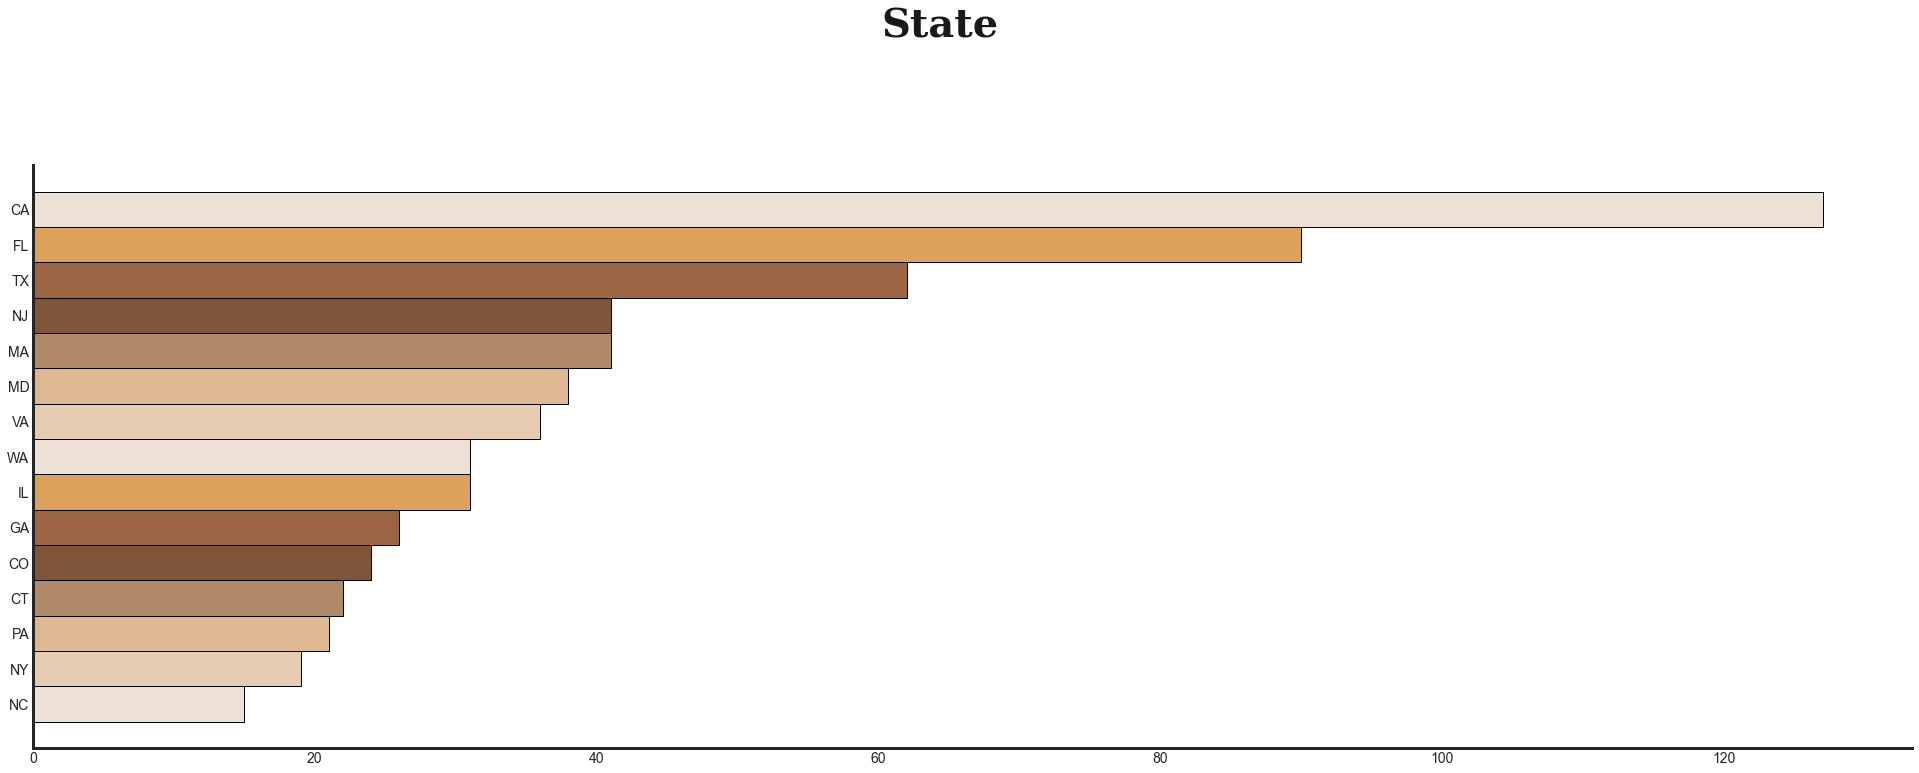

In [302]:
# Picking top 15 states from the dataset to do univariate analysis.
one_bed_subsets = one_bed[one_bed['State'].isin(['CA', 'FL', 'TX', 'NJ', 'MA', 'MD', 'VA', 'WA', 'IL', 'GA', 'CO', 'CT', 'PA', 'NY', 'NC'])]
univariate_analysis(one_bed_subsets, 'State')

<AxesSubplot:>

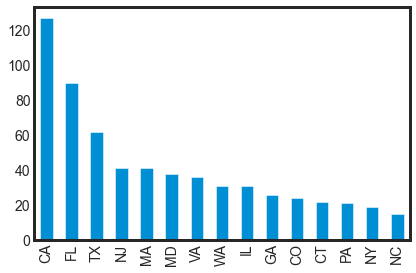

In [303]:
# Alternatively.....
one_bed['State'].value_counts().head(15).plot.bar()

## Statistical Analysis 2 - Feature Selection

We are interested in the columns(features) will have most impact on rent. Therefore, here we analyze the correlations of each column and find the most relevant ones.  

In [304]:
label_encoder = LabelEncoder()
one_bed_latest = one_bed.iloc[: , :5]
one_bed_latest['2019-12'] = one_bed['2019-12']
one_bed_latest['State'] = label_encoder.fit_transform(one_bed_latest['State'])
one_bed_latest['RegionName'] = label_encoder.fit_transform(one_bed_latest['RegionName'])
one_bed_latest['Metro'] = label_encoder.fit_transform(one_bed_latest['Metro'])
one_bed_latest['CountyName'] = label_encoder.fit_transform(one_bed_latest['CountyName'])

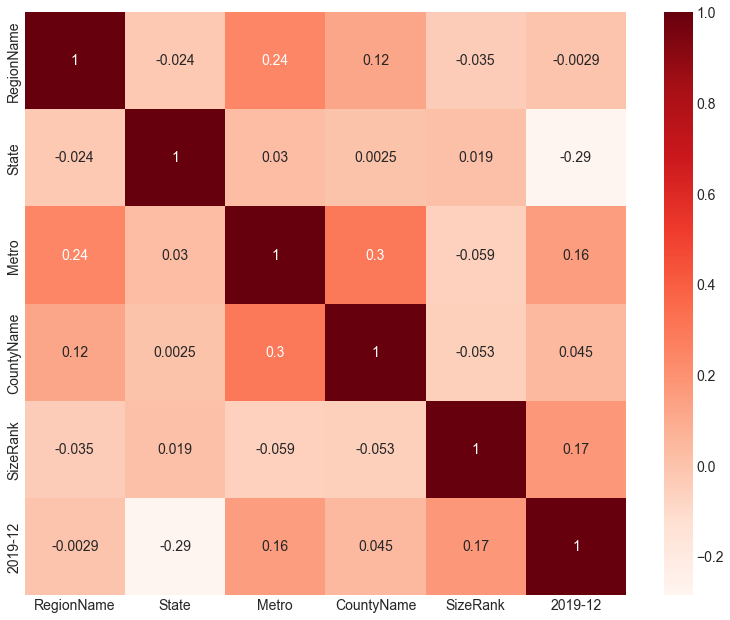

In [305]:
# using Pearson correlation and for simplicity we only consider the latest price here
plt.figure(figsize=(12,10))
cor = one_bed_latest.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

From the heatmap we learned that RegionName and State have negative correlation, whereas CountyName, Metro, and SizeRank have a positive correlation.

In [306]:
# we can also try convert price into different categories (0-1000, 1000-2000, 2000-3000, >3000)
one_bed_latest['2019-12'] = pd.cut(one_bed['2019-12'], bins=[0, 1000, 2000, 3000, 10000], labels=[0,1,2,3])
one_bed_latest.head()

,RegionName,State,Metro,CountyName,SizeRank,2019-12
0,472,34,122,206,1,2
1,384,4,96,140,2,2
2,304,43,72,106,3,1
3,120,14,34,60,4,1
4,604,43,155,21,5,0


In [307]:
X = one_bed_latest.drop('2019-12',axis=1)
y = one_bed_latest['2019-12']
chi_scores = chi2(X,y)
chi_scores

(array([  95.0732215 ,  437.02414697,  508.63068088,  314.27216947,
        2742.10240932]),
 array([1.78065364e-020, 2.11152097e-094, 6.43048409e-110, 8.10277695e-068,
        0.00000000e+000]))

In [308]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

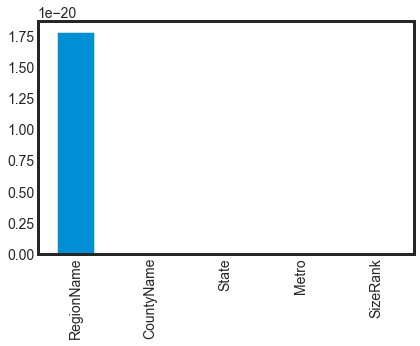

In [309]:
p_values.plot.bar()


From the above graph we know that RegionName has higher p-value. Therefore, it is the most independent variable and should have least impact on the housing price.

In [310]:
'''
Below is a helper function that can help us load zillow housing data.
'''
def load_zillow_data(state=None,county=None,region=None,city=None):
    dictionary_with_file_paths = {'dataset/DaysOnZillow_City.csv' : 'DaysOnZillow_City',
    'dataset/Sale_Prices_City.csv' : 'Sale_Prices_City',
    'dataset/City_MedianRentalPrice_Studio.csv' : 'Studio',
    'dataset/City_MedianRentalPrice_1Bedroom.csv' : '1 Bedroom',
    'dataset/City_MedianRentalPrice_2Bedroom.csv' : '2 Bedrooms',
    'dataset/City_MedianRentalPrice_3Bedroom.csv' : '3 Bedrooms',
    'dataset/City_MedianRentalPrice_4Bedroom.csv' : '4 Bedrooms',
    'dataset/City_MedianRentalPrice_5BedroomOrMore.csv' : '5+ Bedrooms'}

    # Load files into dataframe.
    dictionary_with_dataframes = {}
    for file_path, file_name in dictionary_with_file_paths.items():
        name_of_dataframe = str(file_name)
        dictionary_with_dataframes[name_of_dataframe] = pd.read_csv(file_path)
        dictionary_with_dataframes[name_of_dataframe].rename(columns={'Unnamed: 0':'which_measurement'}, inplace=True)
        dictionary_with_dataframes[name_of_dataframe]['which_measurement'] = name_of_dataframe

    # Combine the dataframes into one large dataframe that has a new column that labels each subsection
    filtered_dataframe = pd.concat(dictionary_with_dataframes.values(), ignore_index=True, sort=True)

    # Filter data based on parameters.
    states_to_keep, counties_to_keep = [state], [county]
    regions_to_keep, cities_to_keep = [region], [city]
    
    if state is not None:
        filtered_dataframe = filtered_dataframe[filtered_dataframe.State.isin(states_to_keep)]
    if county is not None:
        filtered_dataframe = filtered_dataframe[filtered_dataframe.CountyName.isin(counties_to_keep)]
    if region is not None: 
        filtered_dataframe = filtered_dataframe[filtered_dataframe.RegionName.isin(regions_to_keep)]
    if city is not None:   
        filtered_dataframe = filtered_dataframe[filtered_dataframe.Metro.isin(cities_to_keep)]

    for row in filtered_dataframe:
        final_df = filtered_dataframe[[
               '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
               '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
               '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
               '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
               '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
               '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
               '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
               '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
               '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
               '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
               '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
               '2019-07', '2019-08', '2019-09', '2019-10', '2019-11','which_measurement']]
        column_title = final_df['which_measurement'].values
        final_df = final_df.T[:-1]
        final_df.columns = [column_title]
    final_df.columns = ['Sale_Prices_City','Studio','1 Bedroom',
                          '2 Bedrooms','3 Bedrooms']
    final_df['Date'] = final_df.index
    return final_df

def plot_four_columns_using_plotly_express(dataframe,column_one,column_two,column_three,column_four,title,lower_axis_limit,upper_axis_limit):
    '''
    This function plots four numerical columns against a date column.
    It using the plotly express library instead of the normal plotly library.
    '''
    df_melt = dataframe.melt(id_vars='Date', value_vars=[column_one,column_two,column_three,column_four])
    fig = px.line(df_melt, x="Date", y="value", color="variable",title=title).update(layout=dict(xaxis_title='Date',yaxis_title='Median Rent ($USD)',legend_orientation="h",showlegend=True))
    fig.update_xaxes(range=[lower_axis_limit,upper_axis_limit])
    fig.show()
    
def plotly_double_y_axes(dataframe, df_interest_rate, column_one,column_two,column_three,column_four,title,lower_axis_limit,upper_axis_limit):
    df_melt = dataframe.melt(id_vars='Date', value_vars=[column_one,column_two,column_three,column_four])
    fig = px.line(df_melt, x="Date", y="value", color="variable",title=title, render_mode = "webgl").update(layout=dict(xaxis_title='Date',yaxis_title='Median Rent ($USD)',legend_orientation="h",showlegend=True))
    fig2 = px.line(df_interest_rate, x="Date", y=df_interest_rate.filter(regex="Effective_Federal_Funds_Rate").columns, render_mode = "webgl")
    fig2.update_traces(yaxis="y2")
    subfig = make_subplots(specs=[[{"secondary_y": True}]])
    subfig.add_traces(fig.data + fig2.data)
#     subfig.add_trace(fig.data, secondary_y=False)
#     subfig.add_trace(fig2.data, secondary_y=True)
    subfig.layout.xaxis.title="Date"

    subfig.update_layout(
        title_text=title
    )
    subfig.update_yaxes(title_text="Median Rent ($ USD)", secondary_y=False)
    subfig.update_yaxes(title_text="Federal Interest Rate (%)", secondary_y=True)
    subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
    subfig.update_xaxes(range=[lower_axis_limit,upper_axis_limit])
    subfig.show()
    return subfig

In [311]:
# [Commented out after cleaning]

# Cleaning: Only select rows from 2014-02 to 2019-12.
# df_rate = pd.read_csv('dataset/interest_rate.csv')
# df_rate.columns = df_rate.columns.str.replace(' ', '_')
# cols = ["Year","Month", "Day"]
# # Combine year month into "Date"
# df_rate['Date'] = df_rate[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
# # Convert "date" into date type.
# df_rate["Date"] = pd.to_datetime(df_rate["Date"]).dt.date

# mask = (df_rate['Date'] >= datetime.date(2014, 2, 1)) & (df_rate['Date'] <= datetime.date(2019, 12, 31)) & (df_rate['Day'] == 1)
# df_rate = df_rate.loc[mask]
# df_rate = df_rate[["Year", "Month", "Day", "Effective_Federal_Funds_Rate", "Date"]]
# df_rate.to_excel("interest_rate_cleaned.xlsx")


# df_rate = pd.read_csv('dataset/interest_rate_cleaned.csv')
# df_rate = df_rate.dropna(subset=["Year"])
# df_rate.dtypes

# cols = ["Year","Month", "Day"]
# df_rate[cols] = df_rate[cols].astype(np.int64)
# # Combine year month into "Date"
# df_rate['Date'] = df_rate[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
# df_rate["Date"] = pd.to_datetime(df_rate["Date"]).dt.date
# df_rate = df_rate.drop(columns=['Unnamed: 0'])
# df_rate
# df_rate.to_csv('dataset/interest-rate-cleaned.csv')
# df_rate['Date'] = df_rate[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
# df_rate
# plotly_double_y_axes(sanfrancisco_df, df_rate, 'Studio','1 Bedroom','2 Bedrooms','3 Bedrooms',
#                                        'Median Rental Prices in San Francisco, CA','2014-02-01','2019-12-31')

<AxesSubplot:title={'center':'Median Prices of Homes and Rental Units in San Francisco, CA'}>

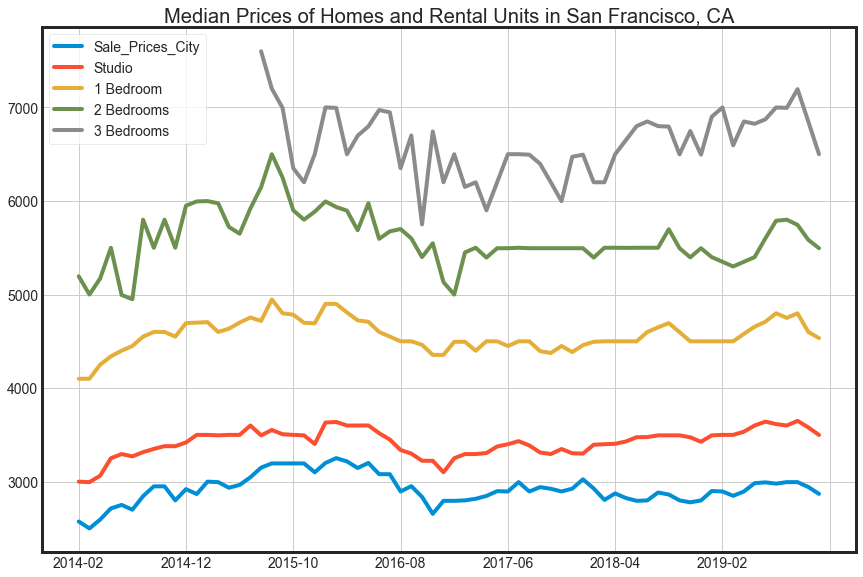

In [312]:
# Plot median rental prices
plot_data = sanfrancisco_df = load_zillow_data(state='CA',county='San Francisco County',
                              region='San Francisco',city='San Francisco-Oakland-Hayward')
sanfrancisco_df.plot(title='Median Prices of Homes and Rental Units in San Francisco, CA',figsize=(13,9), grid=True)

In [313]:
sanfrancisco_df

,Sale_Prices_City,Studio,1 Bedroom,2 Bedrooms,3 Bedrooms,Date
2014-02,2574.0,3000.0,4100.0,5195.0,NaN,2014-02
2014-03,2500.0,2995.0,4100.0,5000.0,NaN,2014-03
2014-04,2595.0,3064.0,4250.0,5172.5,NaN,2014-04
2014-05,2714.0,3250.0,4339.5,5500.0,NaN,2014-05
2014-06,2751.5,3295.0,4400.0,4995.0,NaN,2014-06
...,...,...,...,...,...,...
2019-07,2979.0,3615.0,4800.0,5788.5,6999.5,2019-07
2019-08,2995.0,3600.0,4750.0,5800.0,6995.0,2019-08
2019-09,2995.0,3650.0,4799.0,5744.5,7195.0,2019-09
2019-10,2943.0,3580.0,4600.0,5585.0,6850.0,2019-10


In [314]:
plot_four_columns_using_plotly_express(sanfrancisco_df,'Studio','1 Bedroom','2 Bedrooms','3 Bedrooms',
                                       'Median Rental Prices in San Francisco, CA','2014-02-01','2019-12-31')

# Potential Research Questions
1. Is there a relationship between median rental price and federal interest rate?
2. In general, are inflation rate and median house prices in the United States correlated?
3. Could we predict median rental price in San Francisco in 2025 using a machine learning model?

### Relationship Between Price and Interest Rate

In [315]:
interest_rate = pd.read_csv('dataset/interest_rate.csv')
interest_rate.columns = interest_rate.columns.str.replace(' ', '_')

In [316]:
interest_rate

,Year,Month,Day,Federal_Funds_Target_Rate,Federal_Funds_Upper_Target,Federal_Funds_Lower_Target,Effective_Federal_Funds_Rate,Real_GDP_(Percent_Change),Unemployment_Rate,Inflation_Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...
899,2016,12,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN
900,2017,1,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3
901,2017,2,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2
902,2017,3,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN


In [317]:
interest_rate = interest_rate.loc[(interest_rate['Year'] >= 2014) & (interest_rate['Year'] <= 2019)]

In [318]:
interest_rate = interest_rate.drop("Federal_Funds_Target_Rate", axis=1)

In [319]:
interest_rate = interest_rate.dropna(subset=["Inflation_Rate"])

In [320]:
interest_rate.rename(columns = {
    col : f"{col} ({dtype})"
    for col, dtype in interest_rate.dtypes.to_dict().items()
})

,Year (int64),Month (int64),Day (int64),Federal_Funds_Upper_Target (float64),Federal_Funds_Lower_Target (float64),Effective_Federal_Funds_Rate (float64),Real_GDP_(Percent_Change) (float64),Unemployment_Rate (float64),Inflation_Rate (float64)
862,2014,1,1,0.25,0.00,0.07,-1.2,6.6,1.6
863,2014,2,1,0.25,0.00,0.07,NaN,6.7,1.6
864,2014,3,1,0.25,0.00,0.08,NaN,6.7,1.7
865,2014,4,1,0.25,0.00,0.09,4.0,6.2,1.8
866,2014,5,1,0.25,0.00,0.09,NaN,6.3,2.0
867,2014,6,1,0.25,0.00,0.10,NaN,6.1,1.9
868,2014,7,1,0.25,0.00,0.09,5.0,6.2,1.9
869,2014,8,1,0.25,0.00,0.09,NaN,6.2,1.7
870,2014,9,1,0.25,0.00,0.09,NaN,5.9,1.7
871,2014,10,1,0.25,0.00,0.09,2.3,5.7,1.8


In [321]:
dropped_columns = ['2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
                   '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
                   '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']
one_bed_subset = one_bed.drop(columns=dropped_columns)

In [322]:
one_bed_subset = one_bed_subset.loc[(one_bed_subset['State'] == 'CA') & (one_bed_subset['CountyName'] == 'San Francisco County') & (one_bed_subset['RegionName'] == 'San Francisco') & (one_bed_subset['Metro'] == 'San Francisco-Oakland-Hayward')]

In [323]:
effective_Federal_Funds_Rate = interest_rate["Effective_Federal_Funds_Rate"]
one_bed_by_city = one_bed_subset.iloc[:, 5:].squeeze()

### Based on our initial analysis, there's no correlation between federal interest rate and the median price of one bedroom units in San Francisco.

In [324]:
effective_Federal_Funds_Rate.corr(one_bed_by_city)

nan

# (Part 2) - More plots

## 1. Interest rate and rent in San Francisco, CA from 2014-02 to 2019-12

In [325]:
df_rate = pd.read_csv('dataset/interest_rate_cleaned.csv')
rent_data_with_rates = plotly_double_y_axes(sanfrancisco_df, df_rate, 'Studio','1 Bedroom','2 Bedrooms','3 Bedrooms',
                                       'Interest rate and median rent in San Francisco, CA, from 2014-02 to 2019-12','2014-02-01','2019-12-31')
rent_data_with_rates
# Upload graph to plotly website.
py.plot(rent_data_with_rates, filename="Interest rate and median rent in San Francisco, CA, from 2014-02 to 2019-12", auto_open=False)

'https://plotly.com/~edtsoi430/13/'

## 2. Unemployment rate and rent in San Francisco

In [336]:
# Combine year month into "Date"
cols = ["Year", "Month", "Day"]
df_rate = pd.read_csv('dataset/interest_rate.csv')
df_rate['Date'] = df_rate[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
# Convert "date" into date type.
df_rate["Date"] = pd.to_datetime(df_rate["Date"]).dt.date
mask = (df_rate['Date'] >= datetime.date(2010, 1, 1)) & (df_rate['Date'] <= datetime.date(2019, 12, 31)) & (df_rate['Day'] == 1)
df_rate = df_rate.loc[mask]
# df_rate.to_excel("test.xlsx")

In [363]:
# sanfrancisco_df = load_zillow_data(state='CA',county='San Francisco County',
#                               region='San Francisco',city='San Francisco-Oakland-Hayward')
queens_df = load_zillow_data(state="NY", county="Queens County")

dallas_df = load_zillow_data(state='TX', county="Dallas County", region='Dallas')

tucson_df = load_zillow_data(state='AZ', region='Tucson')

columbus_df = load_zillow_data(state='OH', region='Columbus')

seattle_df = load_zillow_data(state='WA', region='Seattle')

chicago_df = load_zillow_data(state='IL', region='Chicago')

chicago_df

,Sale_Prices_City,Studio,1 Bedroom,2 Bedrooms,3 Bedrooms,Date
2014-02,1467.0,1549.0,1681.0,1700.0,NaN,2014-02
2014-03,1450.0,1510.0,1695.0,1749.0,NaN,2014-03
2014-04,1450.0,1498.0,1681.0,1825.0,NaN,2014-04
2014-05,1495.0,1495.0,1710.0,1999.0,NaN,2014-05
2014-06,1532.0,1544.0,1780.0,2100.0,NaN,2014-06
...,...,...,...,...,...,...
2019-07,1410.0,1600.0,1850.0,2225.0,3000.0,2019-07
2019-08,1430.0,1582.0,1825.0,2100.0,2800.0,2019-08
2019-09,1458.0,1595.0,1825.0,2000.0,2600.0,2019-09
2019-10,1405.0,1542.0,1750.0,1950.0,2400.0,2019-10
